In [60]:
# Import necessary packages
import numpy as np
import pandas as pd

In [61]:
# Load the data
dataframe = pd.read_csv('Bengaluru_House_Data.csv')
dataframe.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [62]:
# Analyze the data
dataframe.info()

# Check for missing values
dataframe.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [63]:
# Check different values in the area_type column
print(dataframe['area_type'].value_counts())
print(len(dataframe['area_type'].unique()))

# Check different values in the location column
print(dataframe['location'].value_counts())
print(len(dataframe['location'].unique()))


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
4
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
1306


In [64]:
# Drop unnecessary columns
dataframe = dataframe.drop(['availability', 'society'], axis=1)

In [65]:
dataframe.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [66]:
# Remove the rows that does not have 'size' value
dataframe = dataframe.dropna(subset=['size'])

In [67]:
dataframe.isnull().sum()

area_type       0
location        1
size            0
total_sqft      0
bath           57
balcony       593
price           0
dtype: int64

In [68]:
# Check unique values in the size column
print(dataframe['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [69]:
# Convert the size column to integer
dataframe['size'] = dataframe['size'].apply(lambda x: int(x.split(' ')[0])) # Split the string and take the first element and convert it to integer

# Change the name of the column size to bhk
dataframe = dataframe.rename(columns={'size': 'bhk'})

dataframe.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [70]:
# Convert the null values of 'bath' column equal to the bhk value of that row
dataframe['bath'] = dataframe['bath'].fillna(dataframe['bhk'])

# Convert the null values of 'balcony' column equal to the median value of that column
dataframe['balcony'] = dataframe['balcony'].fillna(dataframe['balcony'].median())

# Convert 'bath' and 'balcony' columns to integer
dataframe['bath'] = dataframe['bath'].astype(int)
dataframe['balcony'] = dataframe['balcony'].astype(int)

print(dataframe.info())

print(dataframe.head())

print(dataframe.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
Index: 13304 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13304 non-null  object 
 1   location    13303 non-null  object 
 2   bhk         13304 non-null  int64  
 3   total_sqft  13304 non-null  object 
 4   bath        13304 non-null  int64  
 5   balcony     13304 non-null  int64  
 6   price       13304 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 831.5+ KB
None
              area_type                  location  bhk total_sqft  bath  \
0  Super built-up  Area  Electronic City Phase II    2       1056     2   
1            Plot  Area          Chikka Tirupathi    4       2600     5   
2        Built-up  Area               Uttarahalli    3       1440     2   
3  Super built-up  Area        Lingadheeranahalli    3       1521     3   
4  Super built-up  Area                  Kothanur    2       1200     2   

   balco

In [71]:
# Check the 'total_sqft' column values that is not in float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

dataframe[~dataframe['total_sqft'].apply(is_float)].head(10) # Display the rows that are not in float

,area_type,location,bhk,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4,0,186.000
56,Built-up Area,Devanahalli,4,3010 - 3410,4,2,192.000
81,Built-up Area,Hennur Road,4,2957 - 3450,4,2,224.500
122,Super built-up Area,Hebbal,4,3067 - 8156,4,0,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2,0,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2,0,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2,0,56.800
224,Super built-up Area,Devanahalli,3,1520 - 1740,3,2,74.820
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1,0,18.500
549,Super built-up Area,Hennur Road,2,1195 - 1440,2,0,63.770


In [72]:
# Convert the range values to float
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
    
dataframe['total_sqft'] = dataframe['total_sqft'].apply(convert_sqft_to_num)  



In [73]:
# Drop the rows that have null values in the total_sqft column
dataframe = dataframe.dropna(subset=['total_sqft'])

In [74]:
print(dataframe.isnull().sum())

print(dataframe.info())

area_type     0
location      1
bhk           0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 13258 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13258 non-null  object 
 1   location    13257 non-null  object 
 2   bhk         13258 non-null  int64  
 3   total_sqft  13258 non-null  float64
 4   bath        13258 non-null  int64  
 5   balcony     13258 non-null  int64  
 6   price       13258 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 828.6+ KB
None


# Outlier Detection and Removal

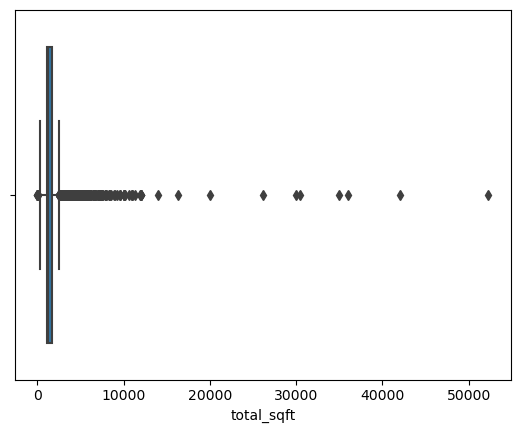

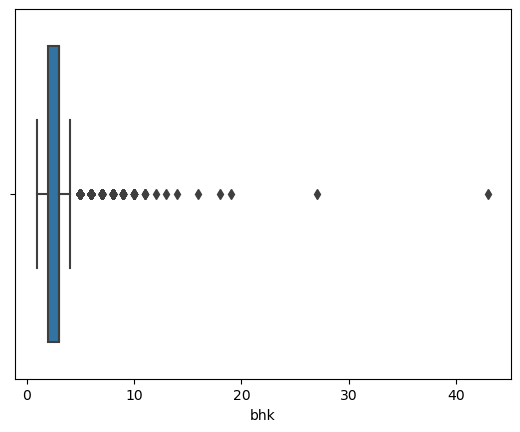

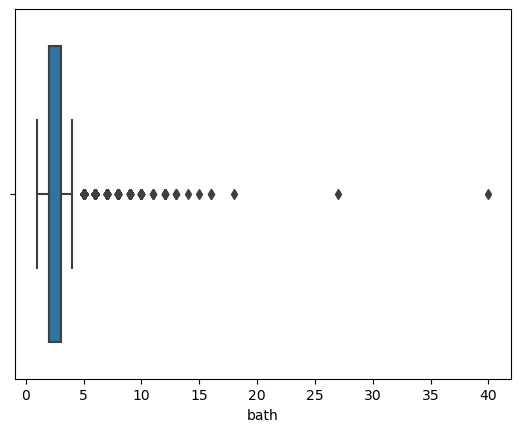

<Axes: xlabel='balcony'>

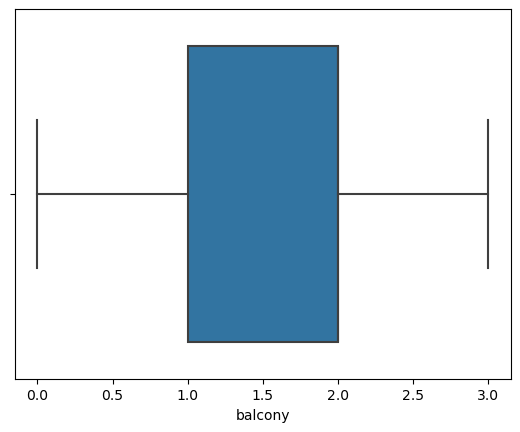

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the boxplot of the 'total_sqft' column
sns.boxplot(x='total_sqft', data=dataframe)
plt.show()

# Plot the boxplot of the 'bhk' column
sns.boxplot(x='bhk', data=dataframe)
plt.show()

# Plot the boxplot of the 'bath' column
sns.boxplot(x='bath', data=dataframe)
plt.show()

# Plot the boxplot of the 'balcony' column
sns.boxplot(x='balcony', data=dataframe)


In [76]:
dataframe['total_sqft'].describe()

count    13258.000000
mean      1558.812282
std       1238.432276
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

Max threshold: 11971.730000000243
Min threshold: 670.0


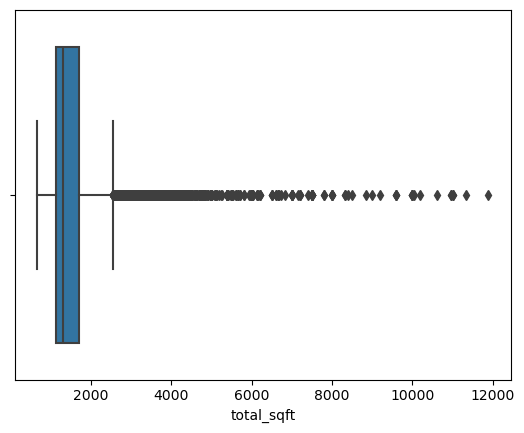

In [77]:
# Remove outliers from the 'total_sqft' column using percentile-based method

max_threshold = dataframe['total_sqft'].quantile(0.999)
print(f"Max threshold: {max_threshold}")

min_threshold = dataframe['total_sqft'].quantile(0.05)
print(f"Min threshold: {min_threshold}")

# print(dataframe[dataframe['total_sqft'] > max_threshold])
# print(dataframe[dataframe['total_sqft'] < min_threshold])   


# Remove outliers from the 'total_sqft' column
dataframe = dataframe[(dataframe['total_sqft'] < max_threshold) & (dataframe['total_sqft'] > min_threshold)]

sns.boxplot(x='total_sqft', data=dataframe)
plt.show()

Max threshold bhk: 10.0


<Axes: xlabel='bhk'>

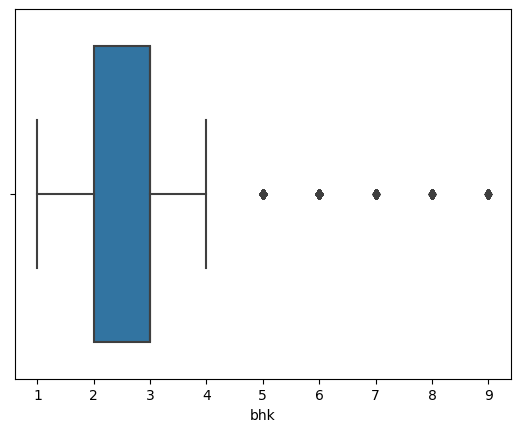

In [78]:
# Remove outliers from the 'bhk' column using percentile-based method

max_threshold = dataframe['bhk'].quantile(0.999)
print(f"Max threshold bhk: {max_threshold}")

dataframe = dataframe[dataframe['bhk'] < max_threshold]

sns.boxplot(x='bhk', data=dataframe)



Max threshold bath: 10.0


<Axes: xlabel='bath'>

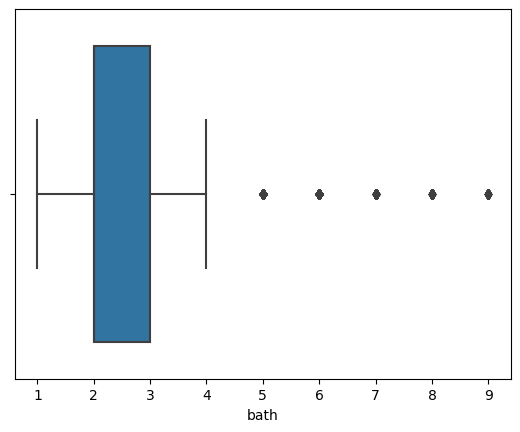

In [79]:
# Remove outliers from the 'bath' column using percentile-based method

max_threshold = dataframe['bath'].quantile(0.999)
print(f"Max threshold bath: {max_threshold}")

dataframe = dataframe[dataframe['bath'] < max_threshold]

sns.boxplot(x='bath', data=dataframe)


In [80]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12541 entries, 0 to 13318
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   12541 non-null  object 
 1   location    12540 non-null  object 
 2   bhk         12541 non-null  int64  
 3   total_sqft  12541 non-null  float64
 4   bath        12541 non-null  int64  
 5   balcony     12541 non-null  int64  
 6   price       12541 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 783.8+ KB


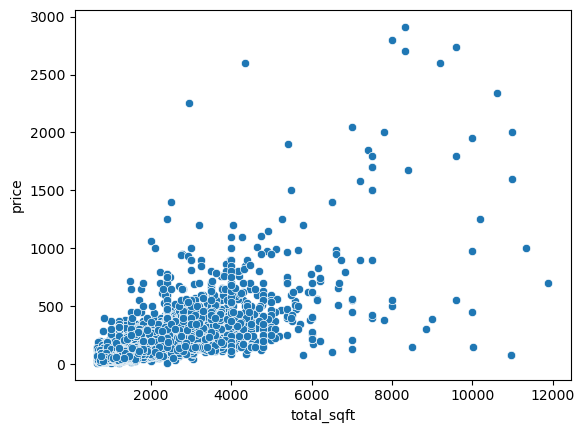

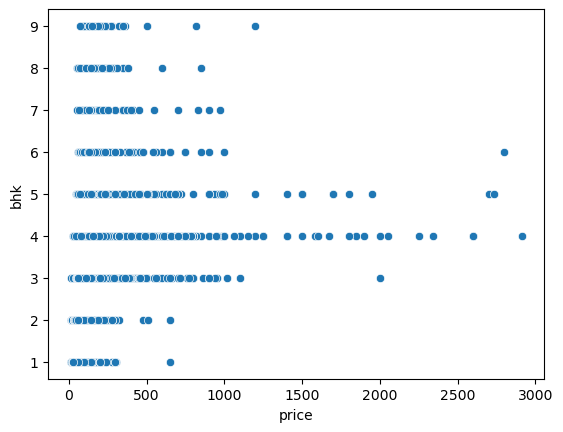

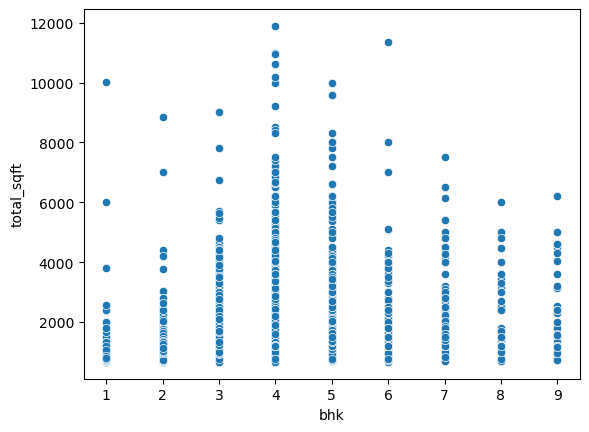

In [81]:
# Draw scatter plot of 'total_sqft' and 'price' columns
sns.scatterplot(x='total_sqft', y='price', data=dataframe)
plt.show()

# Draw scatter plot of 'bhk' and 'price' columns
sns.scatterplot(x='price', y='bhk', data=dataframe)
plt.show()

# Draw scatter plot of 'bhk' and 'total_sqft' columns
sns.scatterplot(x='bhk', y='total_sqft', data=dataframe)
plt.show()


<Axes: xlabel='bhk', ylabel='total_sqft'>

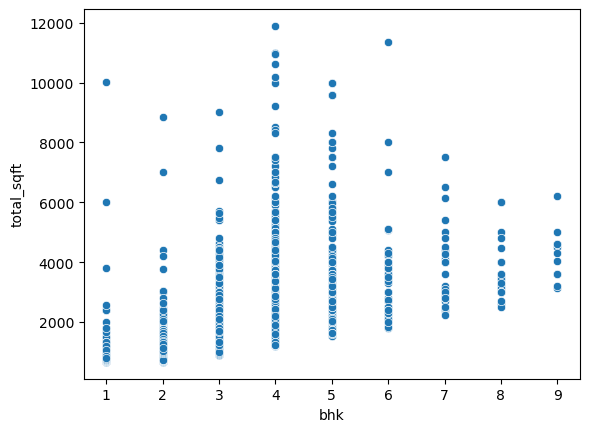

In [82]:
# Remove the outliers that doesnt make sense in 'total_sqft' and 'bhk' columns

dataframe = dataframe[(dataframe['total_sqft'] / dataframe['bhk']) > 300]

sns.scatterplot(x='bhk', y='total_sqft', data=dataframe)

<Axes: xlabel='bhk', ylabel='total_sqft'>

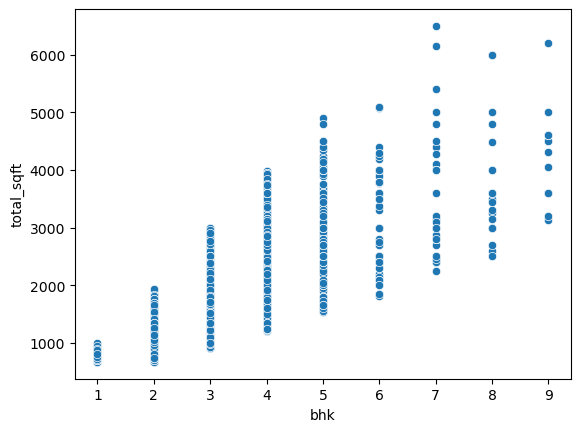

In [83]:
dataframe = dataframe[(dataframe['total_sqft'] / dataframe['bhk']) < 1000]

sns.scatterplot(x='bhk', y='total_sqft', data=dataframe)

In [84]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11436 entries, 0 to 13317
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   11436 non-null  object 
 1   location    11435 non-null  object 
 2   bhk         11436 non-null  int64  
 3   total_sqft  11436 non-null  float64
 4   bath        11436 non-null  int64  
 5   balcony     11436 non-null  int64  
 6   price       11436 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 714.8+ KB


# One hot encoding

In [85]:
# Do one-hot encoding on the 'area_type' column
test = pd.get_dummies(dataframe['area_type'], dtype=int)
print(test.head())

dataframe = pd.concat([dataframe, test], axis=1)
dataframe = dataframe.drop('area_type', axis=1)

print(dataframe.head())


   Built-up  Area  Carpet  Area  Plot  Area  Super built-up  Area
0               0             0           0                     1
1               0             0           1                     0
2               1             0           0                     0
3               0             0           0                     1
4               0             0           0                     1
                   location  bhk  total_sqft  bath  balcony   price  \
0  Electronic City Phase II    2      1056.0     2        1   39.07   
1          Chikka Tirupathi    4      2600.0     5        3  120.00   
2               Uttarahalli    3      1440.0     2        3   62.00   
3        Lingadheeranahalli    3      1521.0     3        1   95.00   
4                  Kothanur    2      1200.0     2        1   51.00   

   Built-up  Area  Carpet  Area  Plot  Area  Super built-up  Area  
0               0             0           0                     1  
1               0             0          

In [86]:
# Apply dimensionality reduction on the 'location' column

dataframe.location = dataframe.location.astype(str).apply(lambda x: x.strip()) # Remove the leading and trailing spaces
location_stats = dataframe['location'].value_counts(ascending=False)
print(location_stats)

location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

dataframe.location = dataframe.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

location
Whitefield               482
Sarjapur  Road           369
Electronic City          264
Kanakpura Road           244
Thanisandra              223
                        ... 
BEML Layout 5th stage      1
Kannur                     1
Gattigere                  1
Panduranga Nagar           1
Annaiah Reddy Layout       1
Name: count, Length: 1116, dtype: int64


In [87]:
# Normalize the 'total_sqft' column
dataframe['total_sqft'] = (dataframe['total_sqft'] - dataframe['total_sqft'].mean()) / dataframe['total_sqft'].std()

In [88]:
dummies = pd.get_dummies(dataframe.location)
dataframe = pd.concat([dataframe,dummies.drop('other',axis='columns')],axis='columns')
dataframe = dataframe.drop('location', axis = 1)

# Model building

In [89]:
X = dataframe.drop('price', axis=1)
y = dataframe['price']

print(X.head())
print(y.head())

   bhk  total_sqft  bath  balcony  Built-up  Area  Carpet  Area  Plot  Area  \
0    2   -0.730660     2        1               0             0           0   
1    4    1.785547     5        3               0             0           1   
2    3   -0.104868     2        3               1             0           0   
3    3    0.027135     3        1               0             0           0   
4    2   -0.495988     2        1               0             0           0   

   Super built-up  Area  1st Phase JP Nagar  5th Phase JP Nagar  ...  \
0                     1               False               False  ...   
1                     0               False               False  ...   
2                     0               False               False  ...   
3                     1               False               False  ...   
4                     1               False               False  ...   

   Vasanthapura  Vidyaranyapura  Vijayanagar  Vittasandra  Whitefield  \
0         False    

In [90]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [91]:
# Train the model using Linear Regression
from sklearn.linear_model import LinearRegression

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression_model.score(X_test, y_test)

0.6223427968169518

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.6223428 , 0.61552309, 0.67502998, 0.51790582, 0.65244683])

In [93]:
# Compare different models
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor

# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         'linear_regression': {
#             'model': LinearRegression(),
#             'params': {
#                 'fit_intercept': [True, False]
#             }
#         },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         },
#         'decision_tree': {
#             'model': DecisionTreeRegressor(),
#             'params': {
#                 'criterion': ['mse', 'friedman_mse'],
#                 'splitter': ['best', 'random']
#             }
#         },
#         'random_forest': {
#             'model': RandomForestRegressor(),
#             'params': {
#                 'n_estimators': [100, 200, 300]
#             }
#         }
#     }
    
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })
        
#     return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# find_best_model_using_gridsearchcv(X, y)



In [94]:
# Predict the price of a house

def predict_price(location, total_sqft, bath, bhk, balcony, area_type):
    if location not in X.columns or area_type not in X.columns:
        return "Location or Area Type not found in the data"
    area_type_index = np.where(X.columns == area_type)[0][0] # Get the index of the area_type column. If the area_type is not in the columns, it will return -1
    loc_index = np.where(X.columns == location)[0][0] # Get the index of the location column. If the location is not in the columns, it will return -1
    
    x = np.zeros(len(X.columns)) # Create an array of zeros with the length of the columns
    x[0] = bhk
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
    if area_type_index >= 0:
        x[area_type_index] = 1
    
    return LinearRegression_model.predict([x])[0]

In [95]:
pridicted_price = predict_price('location_Vidyaranyapura', 1000, 2, 2, 1, 'Plot  Area')
